In [78]:
import pandas as pd
#visualizacion dataframe
pd.options.display.max_rows=500
pd.options.display.max_columns=500
# librarias de grafico
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo y Conociendo el dataset

In [79]:
url = 'https://www.datosabiertos.gob.pe/sites/default/files/DATASET_DE_DATOS_LLAMADAS_CENTRAL_EMERGENCIAS.csv'

In [80]:
df = pd.read_csv('/content/DATASET_DE_DATOS_LLAMADAS_CENTRAL_EMERGENCIAS.csv', on_bad_lines='skip', sep=';')

In [81]:
df.sample(2)

,IDABOMENSAJE,TXNOMBRE,NUMERO_CASO,CENTRAL,UNIDAD,PATRU_INTE,AREACIERRE,TIPOCASO,SUBTIPOCASO,ESTADOCASO,SUBESTADOCASO,TIPI_TIPO_DETE,TIPI_NUMERO,DETE_TIPO_DETE,DETE_CANTIDAD,LOGR_TIPO,LOGR_CANTIDAD,FECHA_LLAMADA,HORAINICIO_LLAMADA,DIANOMBRE,TURNO,UNIDADTELEFONICA,NUMEROTELEFONO,UNIDADORIGEN,DISPOSITIVOORIGEN,ZONA,SECTOR,SUBSECTOR,AA_HH,COMISARIA,REFERENCIA,ESTADO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE
56075,862575,REGPAR01,829376,EMERGENCIA,SERENAZGO A PIE,NO,SERENAZGO,ACTIVIDADES REALIZADAS POR SERENAZGO,PATRULLAJE MUNICIPAL POR SECTOR,A PIE,NaN,NINGUNO,0.0,NINGUNO,0,NINGUNO,0,20220627,144900,LUNES,TARDE,NGN,NGN,CENTRAL DE EMERGENCIAS,PAR,CENTRO,SECTOR 3,SUB - SECTOR 3A,URB. ANTONIA MORENO DE CACERES V SECTOR,VENTANILLA,V SECTOR IZQUIERDO,CERRADA,CALLAO,CALLAO,VENTANILLA,70106,20220630
3724,808560,REGMAN01,780907,EMERGENCIA,SERENAZGO ESPECIALISTA (CHOFER),NO,SERENAZGO,DISPERSADOS,CONSUMIDORES DE ALCOHOL,NaN,NaN,DISPERSADOS,6.0,DISPERSADOS,6,NINGUNO,0,20220112,213605,MIERCOLES,NOCHE,CELULAR,993078306,CENTRAL DE EMERGENCIAS,CEL,CENTRO,SECTOR 2,SUB - SECTOR 2A,URB. CIUDAD SATELITE,VENTANILLA,calle 4 Parque Renacer del Ni&ntilde;o,CERRADA,CALLAO,CALLAO,VENTANILLA,70106,20220630


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56874 entries, 0 to 56873
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IDABOMENSAJE        56874 non-null  int64  
 1   TXNOMBRE            56874 non-null  object 
 2   NUMERO_CASO         56874 non-null  int64  
 3   CENTRAL             56874 non-null  object 
 4   UNIDAD              56874 non-null  object 
 5   PATRU_INTE          56874 non-null  object 
 6   AREACIERRE          56874 non-null  object 
 7   TIPOCASO            56797 non-null  object 
 8   SUBTIPOCASO         56797 non-null  object 
 9   ESTADOCASO          22027 non-null  object 
 10  SUBESTADOCASO       673 non-null    object 
 11  TIPI_TIPO_DETE      56874 non-null  object 
 12  TIPI_NUMERO         56873 non-null  float64
 13  DETE_TIPO_DETE      56874 non-null  object 
 14  DETE_CANTIDAD       56874 non-null  int64  
 15  LOGR_TIPO           56874 non-null  object 
 16  LOGR

## Variables no necesarias

In [83]:
# Variables con un solo valor que no serian relevantes
unicas = ['CENTRAL', 'AREACIERRE', 'UNIDADORIGEN', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'FECHA_CORTE']

In [84]:
# Extraigo las variables no relevantes
df = df.drop(unicas, axis = 'columns')

## Vista general de variables a estudiar

In [85]:
# Valores unicos por variable
df.nunique()

IDABOMENSAJE          52060
TXNOMBRE                  2
NUMERO_CASO           52060
UNIDAD                   15
PATRU_INTE                2
TIPOCASO                 13
SUBTIPOCASO              91
ESTADOCASO              126
SUBESTADOCASO            22
TIPI_TIPO_DETE            8
TIPI_NUMERO              87
DETE_TIPO_DETE            8
DETE_CANTIDAD            18
LOGR_TIPO                 7
LOGR_CANTIDAD             4
FECHA_LLAMADA           181
HORAINICIO_LLAMADA    26527
DIANOMBRE                 7
TURNO                     4
UNIDADTELEFONICA          4
NUMEROTELEFONO         2086
DISPOSITIVOORIGEN         4
ZONA                      6
SECTOR                   13
SUBSECTOR                33
AA_HH                   344
COMISARIA                 3
REFERENCIA            27118
ESTADO                    2
dtype: int64

In [86]:
# Valores vacios por variable
df.isna().sum()

IDABOMENSAJE              0
TXNOMBRE                  0
NUMERO_CASO               0
UNIDAD                    0
PATRU_INTE                0
TIPOCASO                 77
SUBTIPOCASO              77
ESTADOCASO            34847
SUBESTADOCASO         56201
TIPI_TIPO_DETE            0
TIPI_NUMERO               1
DETE_TIPO_DETE            0
DETE_CANTIDAD             0
LOGR_TIPO                 0
LOGR_CANTIDAD             0
FECHA_LLAMADA             0
HORAINICIO_LLAMADA        0
DIANOMBRE                 0
TURNO                     0
UNIDADTELEFONICA          6
NUMEROTELEFONO            0
DISPOSITIVOORIGEN         0
ZONA                     83
SECTOR                   83
SUBSECTOR                83
AA_HH                     1
COMISARIA              1088
REFERENCIA               83
ESTADO                    0
dtype: int64

In [87]:
# Descripcion de las variables cualitativas y cuantitativas
df.describe(include = 'all')

,IDABOMENSAJE,TXNOMBRE,NUMERO_CASO,UNIDAD,PATRU_INTE,TIPOCASO,SUBTIPOCASO,ESTADOCASO,SUBESTADOCASO,TIPI_TIPO_DETE,TIPI_NUMERO,DETE_TIPO_DETE,DETE_CANTIDAD,LOGR_TIPO,LOGR_CANTIDAD,FECHA_LLAMADA,HORAINICIO_LLAMADA,DIANOMBRE,TURNO,UNIDADTELEFONICA,NUMEROTELEFONO,DISPOSITIVOORIGEN,ZONA,SECTOR,SUBSECTOR,AA_HH,COMISARIA,REFERENCIA,ESTADO
count,56874.000000,56874,56874.000000,56874,56874,56797,56797,22027,673,56874,56873.000000,56874,56874.000000,56874,56874.000000,5.687400e+04,56874.000000,56874,56874,56868,56874,56874,56791,56791,56791,56873,55786,56791,56874
unique,NaN,2,NaN,15,2,13,91,126,22,8,NaN,8,NaN,7,NaN,NaN,NaN,7,4,4,2086,4,6,13,33,344,3,27118,2
top,NaN,REGMAN01,NaN,SERENAZGO ESPECIALISTA (CHOFER),NO,ACTIVIDADES REALIZADAS POR SERENAZGO,PATRULLAJE MUNICIPAL POR SECTOR,A PIE,A TRANSEUNTE,NINGUNO,NaN,NINGUNO,NaN,NINGUNO,NaN,NaN,NaN,MIERCOLES,MAÑANA,NGN,NGN,RAD,CENTRO,SECTOR 2,SUB - SECTOR 2A,URB. CIUDAD SATELITE,VENTANILLA,PARQUE,CERRADA
freq,NaN,32811,NaN,26771,49231,18567,8754,5916,185,27379,NaN,54124,NaN,56829,NaN,NaN,NaN,9324,15974,28122,28122,26614,16410,11948,7623,6232,36748,461,56867
mean,834294.251187,NaN,803503.985107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.264502,NaN,0.102718,NaN,0.000844,2.022036e+07,121513.404684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17439.344443,NaN,15201.597820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.567561,NaN,0.588813,NaN,0.031368,1.664264e+02,66254.323484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,805249.000000,NaN,777597.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,2.022010e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,817684.250000,NaN,790025.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,2.022022e+07,74649.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,835635.000000,NaN,803400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000,2.022033e+07,120000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,849815.000000,NaN,816620.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000,2.022051e+07,175230.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analizando Variables

In [88]:
# Cantidad de casos por nro de detenidos 
df['DETE_CANTIDAD'].value_counts()

0     54124
2      1157
1       937
3       407
4       146
5        50
6        20
7         7
8         6
20        4
10        4
15        3
11        2
13        2
12        2
25        1
17        1
40        1
Name: DETE_CANTIDAD, dtype: int64

In [89]:
# Cantidad de casos por turno
df['TURNO'].value_counts()

MAÑANA       15974
TARDE        15260
NOCHE        13913
AMANECIDA    11727
Name: TURNO, dtype: int64

In [90]:
# Cantidad de casos por nro dia
df['DIANOMBRE'].value_counts()

MIERCOLES    9324
MARTES       9053
JUEVES       8864
LUNES        8483
VIERNES      7162
SABADO       7066
DOMINGO      6922
Name: DIANOMBRE, dtype: int64

In [91]:
# Cantidad de casos por Zona
df['ZONA'].value_counts()

CENTRO        16410
SUR CENTRO    14885
NORTE          8490
OESTE A        6139
SUR            5872
OESTE B        4995
Name: ZONA, dtype: int64

## Obtencion devariable hora 

Definiedo la hora segun los turnos
* Manana:  6 - 11
* Tarde: 12 - 17
* Noche: 18 - 23
* Madrugada: 0 - 5

In [92]:
df['HORAINICIO_LLAMADA'] = df['HORAINICIO_LLAMADA'].apply(str)
df['hora'] = df['HORAINICIO_LLAMADA'].str.zfill(6)

df['hora'] = df['hora'].str[:2]
# Regresando a entero
df['hora'] = df['hora'].apply(int)

## Resultados generados del analisis

Definimos para este analisis la peligrosidad se define como el total de detenciones entre la cantidad de casos, segun la zona, el dia del caso y la hora del caso.

### Peligrosidad por zona
* La mayor cantidad de casos fueron registrados en la zona centro; sin embargo, al analizar la efectividad la zona norte fue la que tuvo mayor efectividad en detenidos por caso

In [93]:
# Peligrosidad de detencion por zona
detenidos_zona = df.groupby(by='ZONA', as_index=False).agg(detenidos=('DETE_CANTIDAD','sum'), casos=('IDABOMENSAJE','count'))
detenidos_zona['Peligro'] = (detenidos_zona['detenidos']/detenidos_zona['casos']).round(2)

detenidos_zona = detenidos_zona.sort_values(by='Peligro', ascending=False)
detenidos_zona

,ZONA,detenidos,casos,Peligro
1,NORTE,1504,8490,0.18
3,OESTE B,716,4995,0.14
5,SUR CENTRO,1904,14885,0.13
2,OESTE A,642,6139,0.10
0,CENTRO,837,16410,0.05
4,SUR,239,5872,0.04


<BarContainer object of 6 artists>

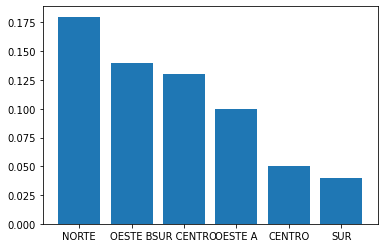

In [94]:
plt.bar(detenidos_zona['ZONA'], detenidos_zona['Peligro'])


### Peligrosidad por Dia
* La mayor cantidad de casos fueron registrados el dia miercoles, este dia tambien se realiza la mayor cantidad de detenciones

In [95]:
detenidos_dia = df.groupby(by='DIANOMBRE', as_index=False).agg(detenidos=('DETE_CANTIDAD','sum'), casos=('IDABOMENSAJE','count'))
detenidos_dia['Peligro'] = (detenidos_dia['detenidos']/detenidos_dia['casos']).round(2)

detenidos_dia = detenidos_dia.sort_values(by='Peligro', ascending=False)
detenidos_dia

,DIANOMBRE,detenidos,casos,Peligro
4,MIERCOLES,1138,9324,0.12
1,JUEVES,933,8864,0.11
3,MARTES,961,9053,0.11
5,SABADO,696,7066,0.10
6,VIERNES,717,7162,0.10
0,DOMINGO,657,6922,0.09
2,LUNES,740,8483,0.09


<BarContainer object of 7 artists>

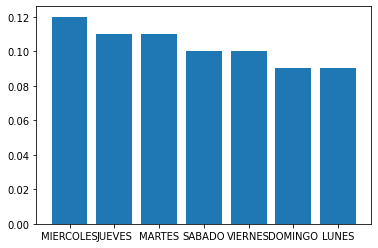

In [96]:
plt.bar(detenidos_dia['DIANOMBRE'], detenidos_dia['Peligro'])

### Peligrosidad por Horario
* La mayor cantidad de casos fueron registrados en el turno mañana, pero en cuestion de efectividad el turno de Noche y amanecida tienen mayor efectividad de detenciones.

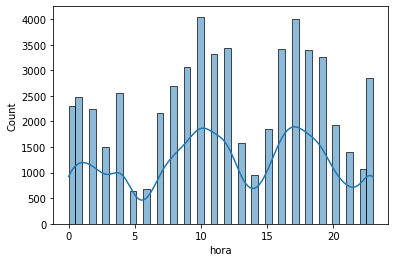

In [97]:
# Cantidad de casos por hora
sns.histplot(df, x='hora', kde=True)

## Analisis de las variables elegidas

In [98]:
# agrupacion de los datos a analizar

df_f = df.groupby(by=['ZONA', 'DIANOMBRE', 'hora'], as_index=False).agg(detenidos=('DETE_CANTIDAD','sum'), casos=('IDABOMENSAJE','count'))
df_f['peligro'] = (df_f['detenidos']/df_f['casos']).round(2)

df_f = df_f.sort_values(by='peligro', ascending=False)

In [99]:
import plotly.express as px

In [113]:
fig = px.bar(df_f, x='hora', y='peligro', facet_row='ZONA', facet_col='DIANOMBRE', 
              category_orders={"DIANOMBRE": ['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']},
              facet_row_spacing=0.02, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.02, # default is 0.03
              height=700, width=900,
              title="Peligrosidad por Hora, Dia y Zona en Ventanilla")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
#fig.update_yaxes(matches=None)
fig.add_annotation(showarrow=False, text='Fuente: Datos Abiertos Peru - Made by: Anamumaq', font=dict(size=10), 
                   xref='x domain', x=8,
                   yref='y domain', y=-1
                   )
fig.show()

In [101]:
fig = px.histogram(df_f, x='hora', y='casos', facet_row='ZONA', facet_col='DIANOMBRE', # color="DIANOMBRE" , #barmode='group', #
              category_orders={"DIANOMBRE": ['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']}, #, "time": ["Lunch", "Dinner"]}) # color="DIANOMBRE"
              facet_row_spacing=0.02, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.02, # default is 0.03
              height=700, width=900,
              title="Total de casos en Ventanilla")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)
fig.show()

In [102]:
fig = px.histogram(df_f, x='hora', y='detenidos', facet_row='ZONA', facet_col='DIANOMBRE', # color="DIANOMBRE" , #barmode='group', #
              category_orders={"DIANOMBRE": ['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']}, #, "time": ["Lunch", "Dinner"]}) # color="DIANOMBRE"
              facet_row_spacing=0.02, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.02, # default is 0.03
              height=700, width=900,
              title="Total de detenciones Ventanilla")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)
fig.show()